In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime

#Make sure there's a config.py in the same folder as this notebook
#if you need to, add the line:
# weather_api_key="245b05a62d94853c3c864cd52e651b5f"
#to try with my api
from config import weather_api_key
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [8]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
coordinates = list(lat_lngs)
coordinates[0]

(-42.27019177212736, 90.15009860631756)

In [10]:
cities = []
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

623

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=34f3249d97db79abaddbfbd3b9268294'

In [13]:
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # preferred_cities_df the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | steamboat springs
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | manavalakurichi
Processing Record 6 of Set 1 | lahaina
Processing Record 7 of Set 1 | kutum
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | agirish
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | wajir
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | mazara del vallo
Processing Record 14 of Set 1 | saint-francois
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | hasilpur
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | celestun
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | carndonagh
Processing Record 22 of Set 1 | kaitangata
Processing Record 23 of S

Processing Record 35 of Set 4 | taclobo
Processing Record 36 of Set 4 | mount gambier
Processing Record 37 of Set 4 | takoradi
Processing Record 38 of Set 4 | ucluelet
Processing Record 39 of Set 4 | korla
Processing Record 40 of Set 4 | taloqan
Processing Record 41 of Set 4 | anisoc
Processing Record 42 of Set 4 | broome
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | opuwo
Processing Record 45 of Set 4 | bulaevo
Processing Record 46 of Set 4 | yomitan
City not found. Skipping...
Processing Record 47 of Set 4 | brzeg dolny
Processing Record 48 of Set 4 | vredendal
Processing Record 49 of Set 4 | cidreira
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | dongsheng
Processing Record 4 of Set 5 | burnie
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | warqla
City not found. Skipping...
Processing Record 7 of Set 

Processing Record 20 of Set 8 | koshurnikovo
Processing Record 21 of Set 8 | bouza
Processing Record 22 of Set 8 | hovd
Processing Record 23 of Set 8 | carnarvon
Processing Record 24 of Set 8 | muroto
Processing Record 25 of Set 8 | sedhiou
Processing Record 26 of Set 8 | codrington
Processing Record 27 of Set 8 | ubinskoye
Processing Record 28 of Set 8 | asasa
Processing Record 29 of Set 8 | oktyabrskiy
Processing Record 30 of Set 8 | moose factory
Processing Record 31 of Set 8 | svetlyy
Processing Record 32 of Set 8 | lumeje
Processing Record 33 of Set 8 | shache
Processing Record 34 of Set 8 | karla
Processing Record 35 of Set 8 | wlodawa
Processing Record 36 of Set 8 | zhanaozen
Processing Record 37 of Set 8 | qui nhon
Processing Record 38 of Set 8 | gangotri
City not found. Skipping...
Processing Record 39 of Set 8 | resistencia
Processing Record 40 of Set 8 | lowestoft
Processing Record 41 of Set 8 | susangerd
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | m

Processing Record 8 of Set 12 | tomatlan
Processing Record 9 of Set 12 | madimba
Processing Record 10 of Set 12 | sisimiut
Processing Record 11 of Set 12 | bubaque
Processing Record 12 of Set 12 | boyolangu
Processing Record 13 of Set 12 | deputatskiy
Processing Record 14 of Set 12 | santa rosa
Processing Record 15 of Set 12 | kampot
Processing Record 16 of Set 12 | qasigiannguit
Processing Record 17 of Set 12 | lolua
City not found. Skipping...
Processing Record 18 of Set 12 | iranshahr
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | alim
Processing Record 22 of Set 12 | karoi
Processing Record 23 of Set 12 | trinidad
Processing Record 24 of Set 12 | barcelos
Processing Record 25 of Set 12 | gat
Processing Record 26 of Set 12 | hokitika
Processing Record 27 of Set 12 | natal
Processing Record 28 of Set 12 | lasa
Processing Record 29 of Set 12 | olivenza
Processing Record 30 of Set 12 | disna
Processing Record 31 of

In [14]:
# Convert the array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,51.01,70,96,6.96,AU,2020-08-21 22:55:31
1,Steamboat Springs,40.48,-106.83,89.01,12,1,8.05,US,2020-08-21 22:51:13
2,Tura,25.52,90.22,72.86,94,86,4.03,IN,2020-08-21 22:55:32
3,Kapaa,22.08,-159.32,86.00,66,40,12.75,US,2020-08-21 22:55:32
4,Manavalakurichi,8.13,77.30,80.60,94,20,3.36,IN,2020-08-21 22:55:33


In [15]:
#Reorder our DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-08-21 22:55:31,-33.65,115.33,51.01,70,96,6.96
1,Steamboat Springs,US,2020-08-21 22:51:13,40.48,-106.83,89.01,12,1,8.05
2,Tura,IN,2020-08-21 22:55:32,25.52,90.22,72.86,94,86,4.03
3,Kapaa,US,2020-08-21 22:55:32,22.08,-159.32,86.00,66,40,12.75
4,Manavalakurichi,IN,2020-08-21 22:55:33,8.13,77.30,80.60,94,20,3.36
...,...,...,...,...,...,...,...,...,...
561,Kuzhithurai,IN,2020-08-21 22:59:49,8.32,77.18,80.60,94,20,3.36
562,Andenes,NO,2020-08-21 22:59:50,69.31,16.12,50.00,93,65,4.70
563,Mashhad,IR,2020-08-21 22:59:50,36.30,59.61,71.60,28,0,6.93
564,Athabasca,CA,2020-08-21 22:59:51,54.72,-113.29,70.21,53,99,13.33


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

NameError: name 'time' is not defined

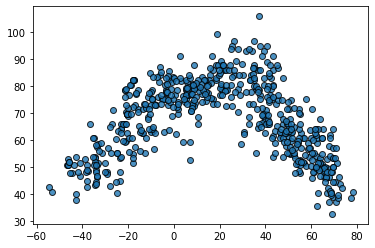

In [37]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
#plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

NameError: name 'time' is not defined

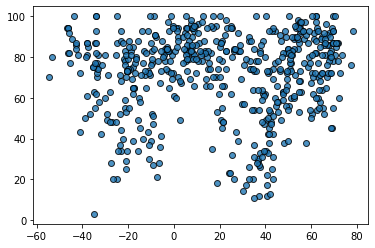

In [38]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humididty (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

NameError: name 'time' is not defined

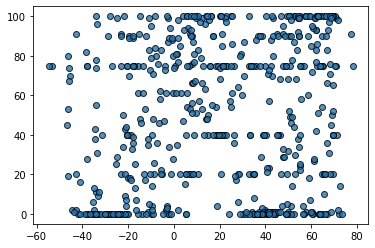

In [39]:
# Build the scatter plot for Latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

NameError: name 'time' is not defined

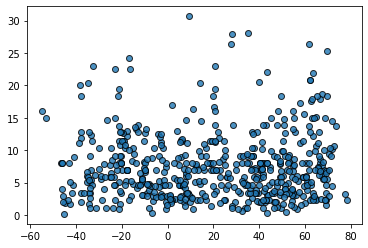

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [23]:
# # Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# # Calculate the regression line "y values" from the slope and intercept.
# regress_values = x_values * slope + intercept

# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)
# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")
# # Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# # Creating a new DataFrame from city_data DataFrame for the northen emysphere
# index13 = city_data_df.loc[13]
# index13

In [26]:
# Creating a new DataFrame from city_data DataFrame for the northen & southern emysphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Steamboat Springs,US,2020-08-21 22:51:13,40.48,-106.83,89.01,12,1,8.05
2,Tura,IN,2020-08-21 22:55:32,25.52,90.22,72.86,94,86,4.03
3,Kapaa,US,2020-08-21 22:55:32,22.08,-159.32,86.00,66,40,12.75
4,Manavalakurichi,IN,2020-08-21 22:55:33,8.13,77.30,80.60,94,20,3.36
5,Lahaina,US,2020-08-21 22:55:33,20.88,-156.68,87.80,45,40,19.46


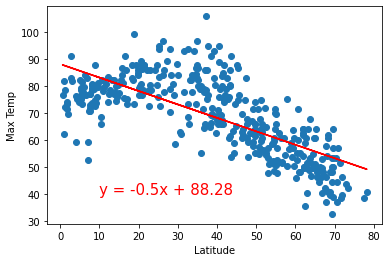

In [27]:
# Linear regression on the Northern Hemisphere(lat vs max temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

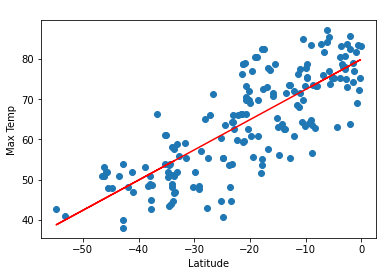

In [28]:
# Linear regression on the Southern Hemisphere(lat vs max temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

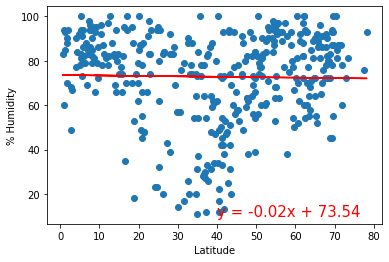

In [29]:
# Linear regression on the Northern Hemisphere(lat vs humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

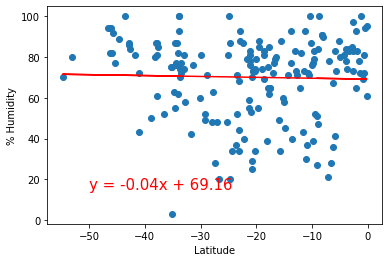

In [30]:
# Linear regression on the Southern Hemisphere(lat vs humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

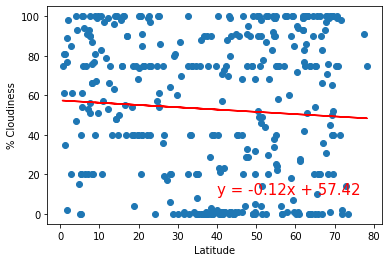

In [31]:
# Linear regression on the Northern Hemisphere(lat vs %Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

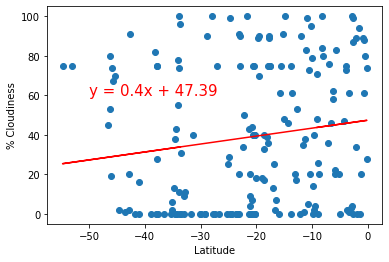

In [32]:
# Linear regression on the Southern Hemisphere(lat vs %Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

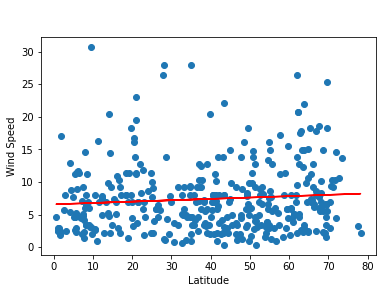

In [33]:
# Linear regression on the Northern Hemisphere(lat vs wind speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

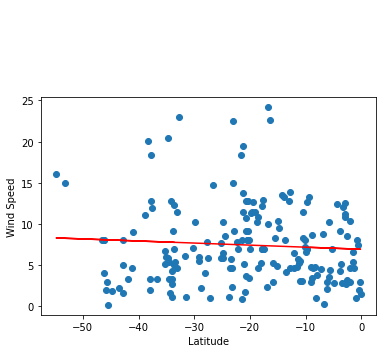

In [34]:
# Linear regression on the Southern Hemisphere(lat vs wind speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))